Grid Search CV es una forma automática y sistemática de encontrar los mejores hiperparámetros de un modelo usando validación cruzada, es decir, prueba muchas configuraciones y se queda con la que mejor generaliza.

Grid Search CV:

1. Define un conjunto de valores posibles para cada hiperparámetro

2. Prueba todas las combinaciones posibles

3. Para cada combinación:
 * Entrena el modelo
 * Lo evalúa con cross-validation

4. Por último, elige la combinación con mejor score promedio

Se crea un objeto de Grid Search con validación cruzada para ajustar un modelo:

grid_search = GridSearchCV(estimator=MODELO, param_grid = param_grid, cv=3,n_jobs=-1, verbose=2)

* estimator=MODELO, es el modelo base que quieres optimizar.

* param_grid=param_grid, es un diccionario con los valores a probar.

* cv=3, divide los datos en 3 partes: entrena con 2 y valida 1. Repite 3 veces y promedia Score

* n_jobs=-1, uso de todos los núcleos del CPU.

* verbose=2, mide el nivel de detalle en pantalla (0,1,2)





En param_grid define, para el caso de Random Forest:

* n_estimators que mide el número de árboles en el bosque. Cuanto mas árboles mas robusto pero mas lento.

* max_depth, profundidad de cada árbol. Limitarla evita overfitting

* min_samples_split, número mínimo de muestras para dividir un nodo. Cuanto mayor sea, los árboles más simples y será menos propensos a overfit

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split

## Clasificación de manzanas en función de su calidad

Dado el dataset *apple_quality* emplea el cross validation y un grid search para entrenar un modelo y a partir del mismo determinar las principales características que determinan la calidad de una manzana.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Nos traemos la base de datos:
df = pd.read_csv('/content/drive/MyDrive/Classroom/19-22 Inteligencia Artificial SEV Enero 2026 - Varios profesores/T3_ML/T5_CLASIFICACION/apple_quality.csv')


In [ ]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB


In [ ]:
df.head()

In [ ]:
df["Acidity"] = df["Acidity"].astype(float)

In [ ]:
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [ ]:
X = df.drop("Quality", axis=1)
y = df["Quality"]

In [ ]:
X.drop("A_id", axis=1, inplace=True)
X

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984
...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
dtypes: float64(7)
memory usage: 250.0 KB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
random_forest = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],   # Número de árboles en el bosque
    'max_depth': [None, 10, 20],  # Profundidad máxima de cada árbol
    'min_samples_split': [2, 5, 10] # Número mínimo de muestras para dividir un nodo
}

In [ ]:
grid_search = GridSearchCV(estimator=random_forest, param_grid = param_grid, cv=3,n_jobs=-1, verbose=2)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [ ]:
grid_search.best_params_

{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}

In [ ]:
best_model = grid_search.best_estimator_
print(best_model)

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)


In [ ]:
features_importances = best_model.feature_importances_
features_importances

array([0.16323317, 0.11651354, 0.15074907, 0.10906292, 0.16082788,
       0.16923136, 0.13038206])

In [ ]:
for feature, importance in zip(X.columns, features_importances):
    print(f"{feature}: {importance}")

Size: 0.16323316965359996
Weight: 0.1165135448738732
Sweetness: 0.15074907031095536
Crunchiness: 0.10906291576332752
Juiciness: 0.16082787695491887
Ripeness: 0.1692313605365946
Acidity: 0.13038206190673063


In [ ]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [ ]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bad       0.91      0.88      0.90       207
        good       0.88      0.91      0.89       193

    accuracy                           0.90       400
   macro avg       0.89      0.90      0.89       400
weighted avg       0.90      0.90      0.90       400



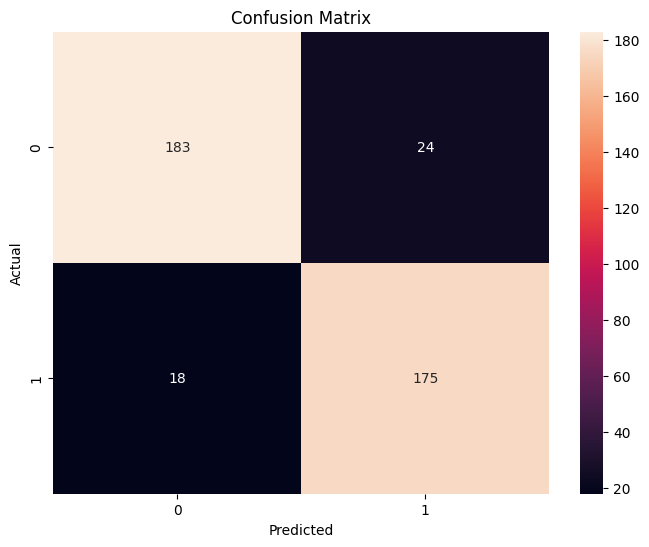

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
#